# Supervised Learning: Classification of Human Activity

## Introduction & Objectives
The primary objective of this assignment is to apply different supervised learning techniques for predicting different classes in a dataset. Although best prediction model is the ultimate goal, it is intended to find a model that also has a decent level of interpretability. The overall process can be summarized as:
1. Select dataset and peform exploratory data analysis
2. Clean dataset, perform transformation and feature engineering if required
3. Build and test different classification models
4. Find a model that performs the best prediction on the holdout data

## Dataset
For this project, the Human Activity Recognition with Smartphones database will be used. This was built from the recordings of study participants performing activities of daily living while carrying a smartphone with embedded inertial sensors. Participants activities were classified into 6 different categories: walking, walking upstairs, walking downstairs, sitting, standing, and laying. Each record in the dataset has:
1. Triaxial acceleration from the accelerometer (total acceleration)
2. Estimated body acceleration based on total acceleration
3. Triaxial Angular velocity from gyriscope
4. A 561-feature vector with time and frequency domain variables
5. Label for activity

<br> The target variable is Activity, in other words the objective is to predict the activity based on the available features. The dataset has 10,299 observations spread across 562 features (including activity, the target). The 561 feature columns are all of type float64, and Activity column is of type object. Laying and Standing activity class has the highest number of observations at 1944 and 1906 respectively, while walking_downstairs activity has the least amount of observations at 1406. Other aspects of the data will be dealt in the next section.
<br>
The dataset can be downloaded from: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data
rawdata = pd.read_csv('Human_Activity_Recognition_Using_Smartphones_Data.csv', sep=',')
rawdata

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


In [3]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 44.2+ MB


In [4]:
rawdata.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

## Data exploration, cleaning and preprocessing
Process of data cleaning and exploration can be summarized as:
1. get list of feature and target columns
2. Encode Activity column using label encoder
3. Check feature column value range for scaling

In [5]:
# Create copy of data
data = rawdata.copy()

# get feature columns
feature_cols = data.dtypes.index[data.dtypes == float]
target_col = 'Activity'

In [6]:
# Encode Activity column using label encoder
from sklearn.preprocessing import LabelEncoder

# Inititate encoder
labelencode = LabelEncoder()

# Transform
data[target_col] = labelencode.fit_transform(data[target_col])

In [7]:
# Check feature columns data range
data[feature_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,10299.0,0.274347,0.067628,-1.0,0.262625,0.277174,0.288354,1.0
tBodyAcc-mean()-Y,10299.0,-0.017743,0.037128,-1.0,-0.024902,-0.017162,-0.010625,1.0
tBodyAcc-mean()-Z,10299.0,-0.108925,0.053033,-1.0,-0.121019,-0.108596,-0.097589,1.0
tBodyAcc-std()-X,10299.0,-0.607784,0.438694,-1.0,-0.992360,-0.943030,-0.250293,1.0
tBodyAcc-std()-Y,10299.0,-0.510191,0.500240,-1.0,-0.976990,-0.835032,-0.057336,1.0
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",10299.0,0.017683,0.616188,-1.0,-0.493108,0.017192,0.536137,1.0
"angle(tBodyGyroJerkMean,gravityMean)",10299.0,-0.009219,0.484770,-1.0,-0.389041,-0.007186,0.365996,1.0
"angle(X,gravityMean)",10299.0,-0.496522,0.511158,-1.0,-0.817288,-0.715631,-0.521503,1.0
"angle(Y,gravityMean)",10299.0,0.063255,0.305468,-1.0,0.002151,0.182028,0.250790,1.0


In [8]:
# Min / Max range of feature columns and check for null values
(data[feature_cols].max() == 1).all(), (data[feature_cols].min() == -1).all(), data[feature_cols].isna().any().any()

(True, True, False)

It is evident from the feature statistics, and confirmed that minimum value=-1 and max value=1 for all features. This implies that the data is already scaled and does not require further data scaling. Furthermore, the data does not have any null values.
<br> Activity class distribution:
<br> LAYING                1944
<br> STANDING              1906
<br> SITTING               1777
<br> WALKING               1722
<br> WALKING_UPSTAIRS      1544
<br> WALKING_DOWNSTAIRS    1406
<br> Since the activity classes do not have similar number of observations, the data might require up or down sampling. However, for the current dataset, no resampling is performed. Rather, the dataset is split while maintaining proportion of different classes in training and test samples. Furthermore, stratified sampling will be used in cross-validation to maintain the proportions. This is being done to generate a model that generalizes well without losing precious information from majority classes while downsampling or assigning higher weight towards minority class while upsampling. 

<AxesSubplot:>

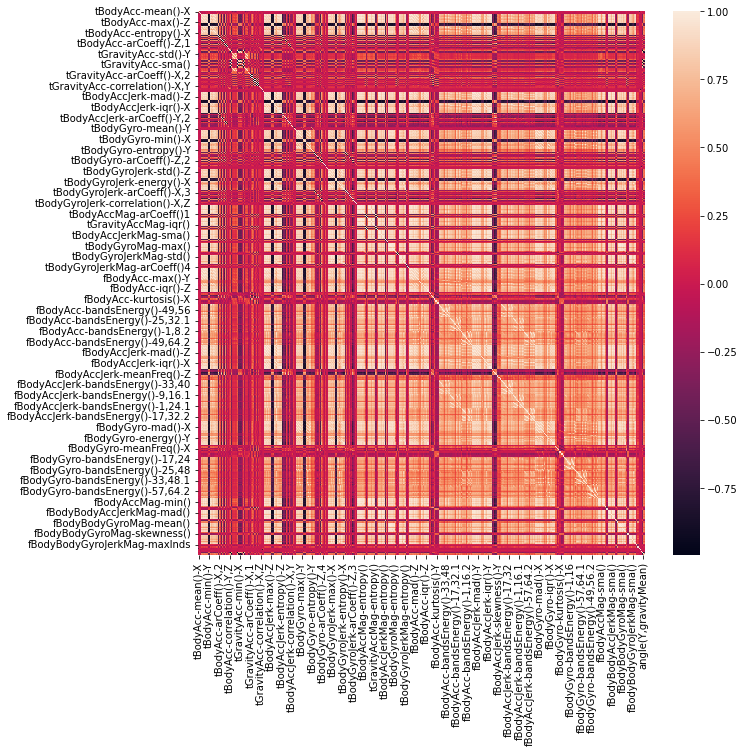

In [9]:
# Correlation map
fig, ax = plt.subplots(1, figsize=(10,10))
sns.heatmap(data[feature_cols].corr(), ax=ax)

[Text(0.5, 0, 'Absolute Correlation'), Text(0, 0.5, 'Frequency')]

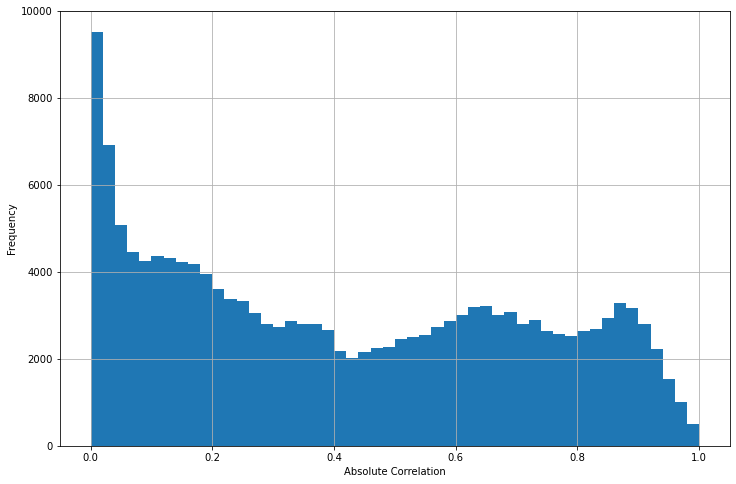

In [10]:
# Get correlations for a cleaner plot
corr_values = np.array(data[feature_cols].corr())

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make unsed values nan
corr_values[tril_index] = np.nan
corr_values = pd.DataFrame(corr_values, columns=feature_cols, index=feature_cols)

# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1', 'level_1':'feature2', 0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

# Plot data
ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency')

The heatmap shows that apart from a couple of feature that have high positive or negative correlation, the dataset generalizes well. THis is also evident from the histogram. Only a few features have absolute correlation > 0.8. Since there are 561 features, the influence of the highly correlated features might not strongly influence the model and should generalize well for a hold-out dataset. 

## Classification Models
Here we test a few classification models:
1. Logistic Regression
2. K-Nearest Neighbors
3. Stochastic Gradient Descent with Nystroem
4. Decision Tree
5. AdaBoost

For each of the models, stratified K-Fold cross validation is used to get a good generalized model. The train-test split will be consistent between different models, and will be in 70% train, 30% test ratio. Furthermore, for each of the individual models, hyperparameter exploration is done to get a model that trades off well between bias and variance.

In [11]:
# Split data
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=50)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Test Train split
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, target_col]

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, target_col]

# Check ratio of activities in split data
print('Proportion of activities in training set:')
print(y_train.value_counts(normalize=True))
print('Proportion of activities in holdout set:')
print(y_test.value_counts(normalize=True))

Proportion of activities in training set:
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64
Proportion of activities in holdout set:
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64


It is confirmed that both training and holdout set have same proportion of activities

### Logistic Regression


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize
import pickle

In [ ]:
# store outputs
metrics = list()
con_matrix = dict()

In [38]:
# Helper functions to plot
from colorsetup import colors, palette

def plot_cm(matrix, name):
    
    fig, ax = plt.subplots(1, figsize=(5,5))
    
    sns.heatmap(matrix, ax=ax, annot=True, fmt='d', cmap=colors, xticklabels=labelencode.classes_, yticklabels=labelencode.classes_)
    ax.set(title=name)
    
    return
    
def get_metrics(y_test, y_pred, name):
        
    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
    
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
                        label_binarize(y_pred, classes=[0,1,2,3,4,5]),
                        average='weighted')
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    df = pd.Series({'precision':precision,
               'recall':recall,
               'f1-score':fscore,
               'accuracy':accuracy,
               'auc':auc},
              name=name)
    
    # Plot confusion matrix
    plot_cm(cm, name)
    
    # Print classification report
    classification_report(y_pred, y_test)
    
    return df, cm

In [14]:
# Initialize cross validation method
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [15]:
LR = LogisticRegression(random_state=50, solver='saga', class_weight='balanced', max_iter=5e4)

# Param grid
param_grid = {'penalty': ['l2'],
             'C': np.geomspace(1, 200, 5)}

GS_LR = GridSearchCV(LR, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=skf.split(X_train, y_train))

GS_LR = GS_LR.fit(X_train, y_train)

precision    0.984159
recall       0.984142
f1-score     0.984149
accuracy     0.984142
auc          0.990371
Name: Logistic_Regression, dtype: float64
-------------------------------
{'C': 14.142135623730951, 'penalty': 'l2'}
-------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       580
           1       0.96      0.96      0.96       534
           2       0.96      0.96      0.96       572
           3       1.00      1.00      1.00       519
           4       1.00      1.00      1.00       422
           5       1.00      1.00      1.00       463

    accuracy                           0.98      3090
   macro avg       0.99      0.98      0.99      3090
weighted avg       0.98      0.98      0.98      3090



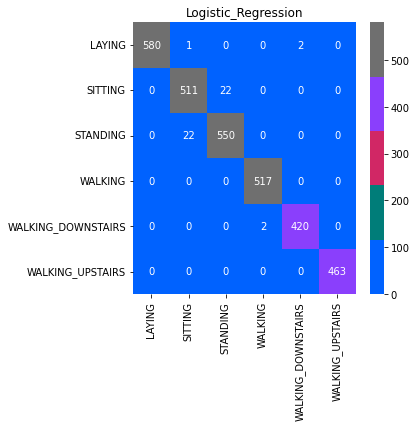

In [39]:
y_pred = GS_LR.predict(X_test)

metric, cm = get_metrics(y_test, y_pred, 'Logistic_Regression')
metrics.append(metric)
con_matrix['GS_LR'] = cm
print(metric)
print('-------------------------------')
print(GS_LR.best_params_)
print('-------------------------------')
print(classification_report(y_pred, y_test))

### K-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(weights='distance')

param_grid = {'n_neighbors': np.arange(10, 100, 10)}

GS_KNN = GridSearchCV(KNN, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=skf.split(X_train, y_train))

GS_KNN = GS_KNN.fit(X_train, y_train)

precision    0.965683
recall       0.965372
f1-score     0.965278
accuracy     0.965372
auc          0.978927
Name: KNN, dtype: float64
-------------------------------
{'n_neighbors': 10}
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       584
           1       0.89      0.93      0.91       505
           2       0.94      0.90      0.92       598
           3       1.00      0.98      0.99       527
           4       0.97      1.00      0.98       409
           5       1.00      0.99      1.00       467

    accuracy                           0.97      3090
   macro avg       0.97      0.97      0.97      3090
weighted avg       0.97      0.97      0.97      3090



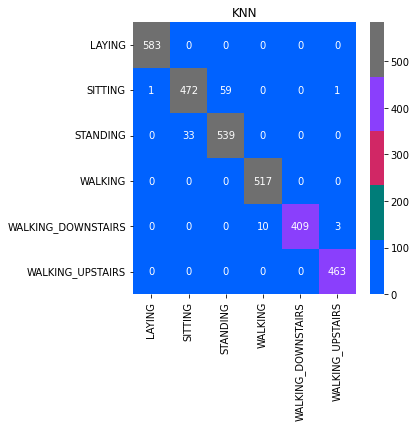

In [40]:
y_pred = GS_KNN.predict(X_test)
metric, cm = get_metrics(y_test, y_pred, 'KNN')
metrics.append(metric)
con_matrix['GS_KNN'] = cm
print(metric)
print('-------------------------------')
print(GS_KNN.best_params_)
print('-------------------------------')
print(classification_report(y_pred, y_test))

### Stochastic Gradient Descent with Nystroem

In [31]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

# Create feature map
estimator = Pipeline([('kernel', Nystroem(kernel='rbf')),
                      ('sgd', SGDClassifier(penalty='l2', random_state=50))])

param_grid = {'kernel__n_components': np.arange(50, 300, 50),
              'sgd__alpha': [1e-2, 1e-1, 1e0, 1e1, 1e2]}

GS_SGD = GridSearchCV(estimator, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=skf.split(X_train, y_train))

GS_SGD = GS_SGD.fit(X_train, y_train)

precision    0.850996
recall       0.820388
f1-score     0.793122
accuracy     0.820388
auc          0.891081
Name: SGD w/ Nystroem, dtype: float64
-------------------------------
{'kernel__n_components': 250, 'sgd__alpha': 1.0}
-------------------------------
              precision    recall  f1-score   support

           0       1.00      0.76      0.87       764
           1       0.26      0.97      0.41       144
           2       0.99      0.73      0.84       777
           3       0.90      0.93      0.92       499
           4       0.92      0.81      0.86       479
           5       0.85      0.92      0.88       427

    accuracy                           0.82      3090
   macro avg       0.82      0.85      0.80      3090
weighted avg       0.91      0.82      0.85      3090



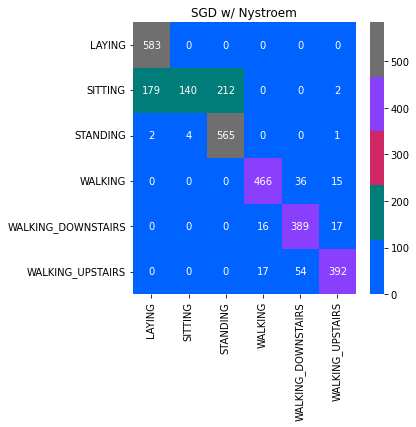

In [41]:
y_pred = GS_SGD.predict(X_test)
metric, cm = get_metrics(y_test, y_pred, 'SGD w/ Nystroem')
metrics.append(metric)
con_matrix['GS_GSD'] = cm
print(metric)
print('-------------------------------')
print(GS_SGD.best_params_)
print('-------------------------------')
print(classification_report(y_pred, y_test))

### Decision Tree - Random Forest
Initial run with n_estimators ranged from 0 to 400, and the best fit model estimated 400. Since accuracy was not that good, re-ran with different set of n_estimators

In [33]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': np.arange(400, 800, 50)}

RF = RandomForestClassifier(oob_score=True, random_state=50, warm_start=True)

GS_RF = GridSearchCV(RF, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=skf.split(X_train, y_train))

GS_RF = GS_RF.fit(X_train, y_train)

precision    0.979311
recall       0.979288
f1-score     0.979278
accuracy     0.979288
auc          0.987487
Name: Random_Forest, dtype: float64
-------------------------------
{'n_estimators': 700}
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       0.95      0.96      0.96       526
           2       0.97      0.95      0.96       579
           3       0.99      0.99      0.99       518
           4       0.98      0.99      0.98       417
           5       0.99      0.99      0.99       467

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



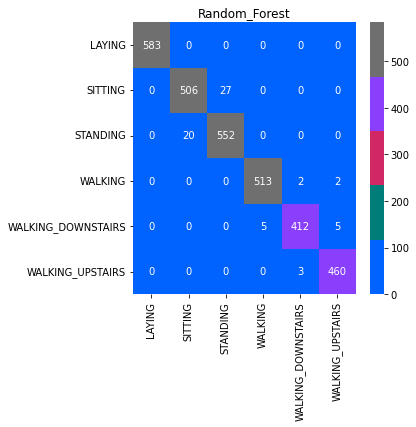

In [42]:
y_pred = GS_RF.predict(X_test)
metric, cm = get_metrics(y_test, y_pred, 'Random_Forest')
metrics.append(metric)
con_matrix['GS_RF'] = cm
print(metric)
print('-------------------------------')
print(GS_RF.best_params_)
print('-------------------------------')
print(classification_report(y_pred, y_test))

### AdaBoost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': np.arange(200, 600, 50),
              'learning_rate': [0.1, .01, 0.001]}

GS_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=skf.split(X_train, y_train))

GS_ABC = GS_ABC.fit(X_train, y_train)

precision    0.754419
recall       0.665372
f1-score     0.627551
accuracy     0.665372
auc          0.798109
Name: AdaBoost, dtype: float64
-------------------------------
{'learning_rate': 0.1, 'n_estimators': 250}
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       582
           1       0.58      0.63      0.60       489
           2       0.69      0.64      0.66       616
           3       0.97      0.46      0.63      1076
           4       0.02      1.00      0.05        10
           5       0.57      0.83      0.68       317

    accuracy                           0.67      3090
   macro avg       0.64      0.76      0.60      3090
weighted avg       0.81      0.67      0.70      3090



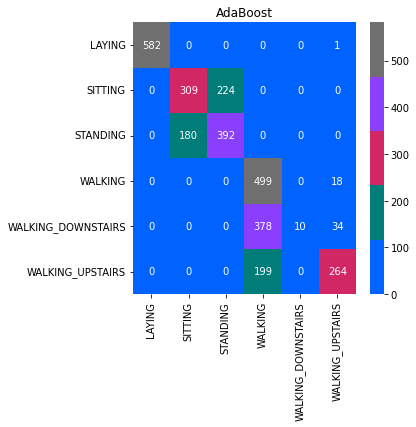

In [45]:
y_pred = GS_ABC.predict(X_test)
metric, cm = get_metrics(y_test, y_pred, 'AdaBoost')
metrics.append(metric)
con_matrix['GS_ABC'] = cm
print(metric)
print('-------------------------------')
print(GS_ABC.best_params_)
print('-------------------------------')
print(classification_report(y_pred, y_test))

## Summary & Conclusion

In [70]:
metrics = pd.concat(metrics, axis=1)

In [72]:
metrics

,Logistic_Regression,KNN,SGD w/ Nystroem,Random_Forest,AdaBoost
precision,0.984159,0.965683,0.852647,0.978030,0.754419
recall,0.984142,0.965372,0.822977,0.977994,0.665372
f1-score,0.984149,0.965278,0.797026,0.977989,0.627551
accuracy,0.984142,0.965372,0.822977,0.977994,0.665372
auc,0.990371,0.978927,0.892659,0.986710,0.798109


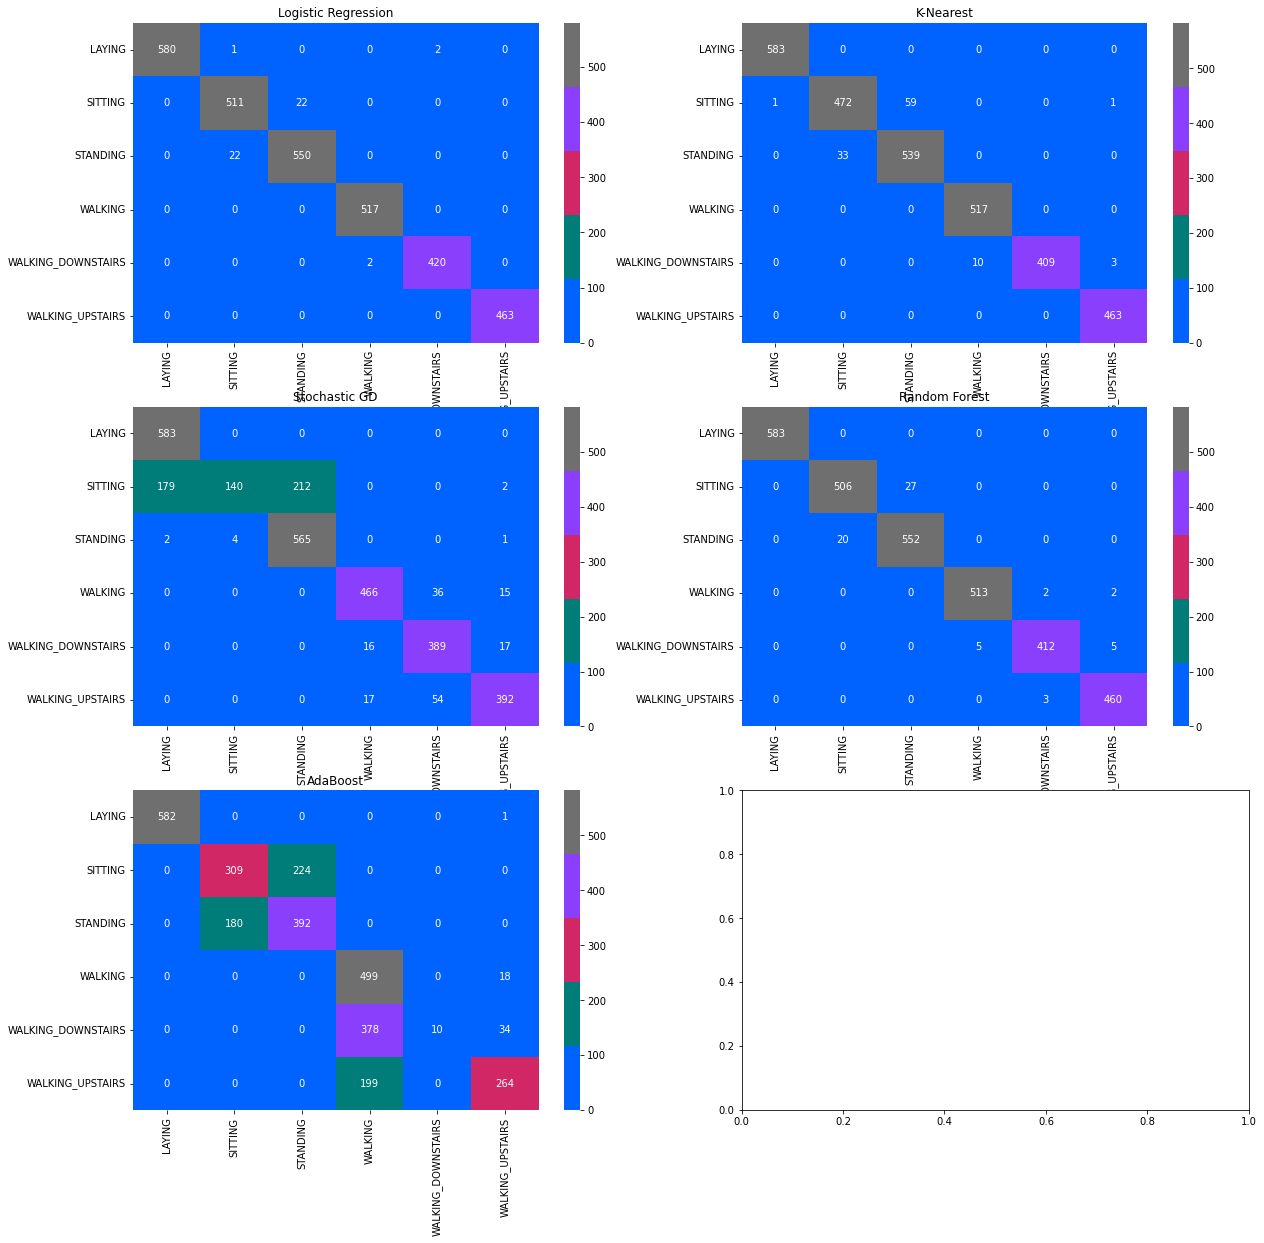

In [83]:
# Plot all confusion matrices below
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

for ax, model, name in zip(axs.ravel(), con_matrix, ['Logistic Regression', 'K-Nearest', 'Stochastic GD', 'Random Forest', 'AdaBoost']):
    sns.heatmap(con_matrix[model], ax=ax, annot=True, fmt='d', cmap=colors, xticklabels=labelencode.classes_, yticklabels=labelencode.classes_)
    ax.set(title=name)

Metrics from model are listed above. Each of these classification models were fine tuned with hyperparameters that give the best results for the holdout dataset. As can be seen from metrics and confusion matrices, Logistic Regression performed the best with an accuracy of 98%. Random Forest and K-Nearest neighbors also performed relatively well with an accuracy of 97.7% and 96.5% respectively. However, Stochastic gradient descent and AdaBoost methods did not perform well with an accuracy of 82% and 66% respectively. It can also be seen that out of all classes, the models were missclassifying Sitting and Standing classes. From the experimentation it can be deduced that either Logistic Regression or Random Forest would perform well for the given dataset.
<br> As was noted in data description, the dataset has unbalanced classes. Although, it was found that for the given dataset using a Stratified sampling approach would be sufficient, further experimentation can be done by upsampling minority and downsampling majority classes, and retraining the models with a balanced dataset. Since the models are getting confused between Sitting and Standing classes, the models would also benefit from more observations. Further experiments can be performed by stacking all of these models and generating a voted score for the predicted class. However, this was not performed here because both Logistic Regression and Random Forest models have high accuracy, and the recall score is also very high. Therefore these models would work great for the current dataset and also on new data.